In [1]:
import sys
import os

pwd = os.getcwd()
path = pwd
while True:
    try:
        sys.path.append(path)
        from __init__ import *
    except ModuleNotFoundError:
        sys.path.remove(path)
        path = os.path.dirname(path)
    else:
        break
print("pwd:", pwd)

HOME_LOC: /Project/Project/ADMA2024/v0.1
pwd: /Project/Project/ADMA2024/v0.1/CODE/Demo


In [2]:
train_model = MODEL_DICT["default"]
train_method_path = Trainer(model=train_model).method_path

/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Weights not initialized. Attempting to generate weights for visualization.
This is only a demo.


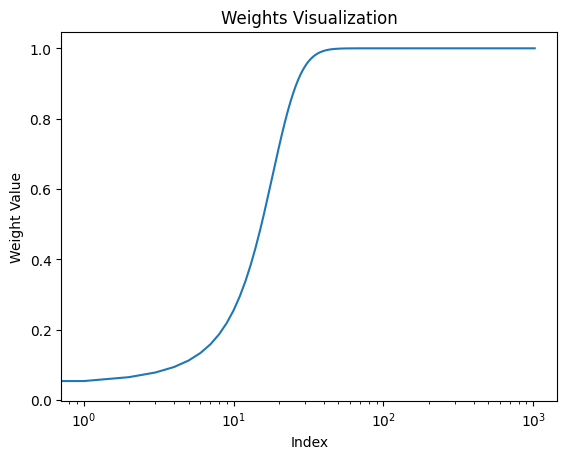

In [3]:
from CODE.Attack.correlation import wcf_S

corr_parameter = {
    "weight_fun": wcf_S,
    "para": {"steepness": 0.2, "midpoint": 0.015},
}
wcf_S(**corr_parameter["para"]).visualize()

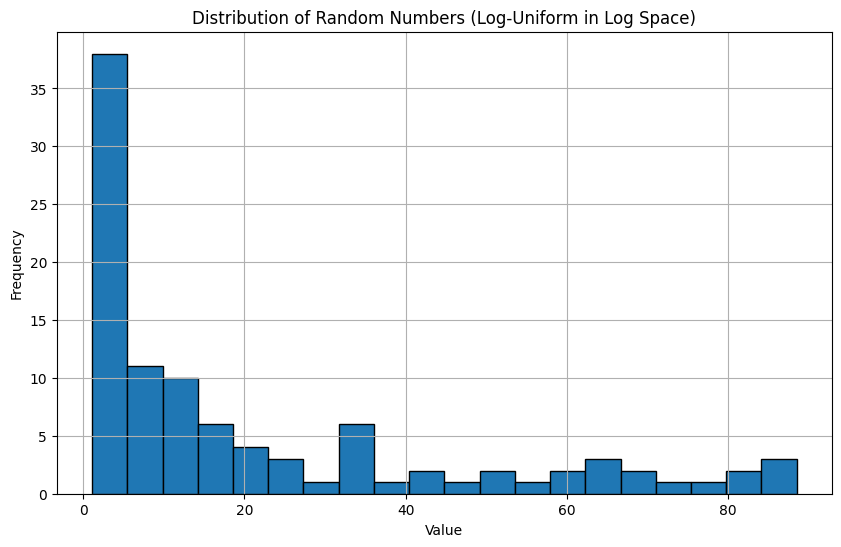

In [12]:
import matplotlib.pyplot as plt

# 循环执行函数100次，收集随机数
random_numbers = log_uniform_random_number(num=100)

# 绘制随机数的分布图
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=20, edgecolor="black")
plt.title("Distribution of Random Numbers (Log-Uniform in Log Space)")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [16]:
import os  # 用于文件路径操作
import pandas as pd  # 用于读取csv文件

# 假设的数据集名称列表
dataset_names = [f"Dataset{i}" for i in range(1, 129)]  # 生成128个数据集名称

# 基础路径
base_path = "/Project/Project/ADMA2024/v0.1/OUTPUT/attack/model=Classifier_INCEPTION_defence=None/swap=False_kl_loss=False_CW=True"

# 初始化字典来存储每个数据集的duration
duration_dict = {}

# 循环遍历每个数据集
for dataset_name in UNIVARIATE_DATASET_NAMES:
    # 构建每个数据集的文件路径
    file_path = os.path.join(base_path, dataset_name, "results.csv")

    # 假设我们可以读取文件，实际中可以使用pd.read_csv(file_path)来读取
    df = pd.read_csv(file_path)
    # 这里使用模拟的数据来代替真实的文件读取操作
    # df = pd.DataFrame({"duration": [15.7]})  # 假设的DataFrame，实际中会从文件读取

    # 从DataFrame中提取duration值
    duration = df["duration"].iloc[0]

    # 将提取的duration值存入字典
    duration_dict[dataset_name] = duration

# 打印结果，实际应用中可能需要处理或进一步使用这个字典
# print(duration_dict)

In [18]:
duration_dict["Beef"]

7.757341146469116

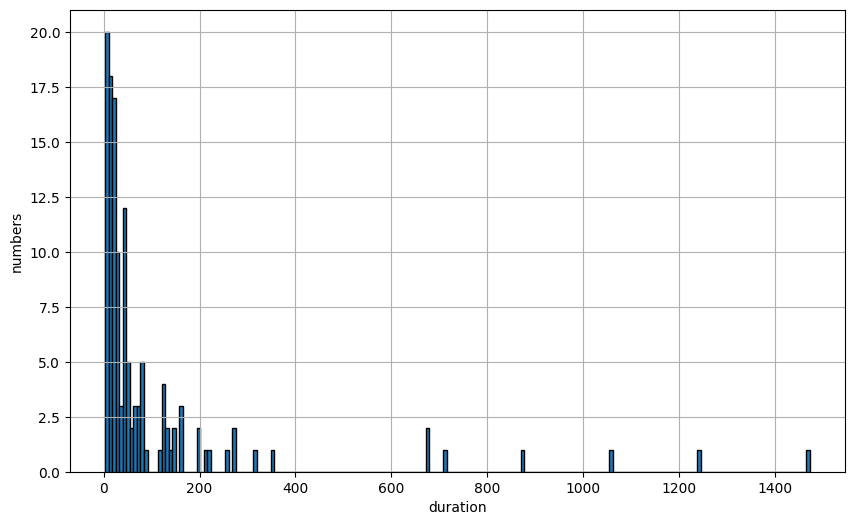

In [23]:
import matplotlib.pyplot as plt

# 绘制随机数的分布图
plt.figure(figsize=(10, 6))
plt.hist(duration_dict.values(), bins=200, edgecolor="black")
plt.xlabel("duration")
plt.ylabel("numbers")
plt.grid(True)
plt.show()

In [3]:
attack_method = ""
from CODE.Utils.constant import MODEL_DICT
from CODE.Train.trainer import Trainer

from CODE.Attack.fft import FFT
from CODE.Attack.cosine import COS
from CODE.Attack.pgd import PGD
from CODE.Attack.swap import SWAP
from CODE.Attack.swap_l2 import SWAPL2

attack_method_list = [FFT, COS, PGD, SWAP, SWAPL2]
model_list = unique_and_ordered(MODEL_DICT.values())

for i_attack_method in attack_method_list:
    for i_train_model in model_list:
        trainer = Trainer(
            model=i_train_model,
        )
        trainer_method_path = trainer.method_path
        del trainer
        torch.cuda.empty_cache()
        attacker = i_attack_method(
            dataset="Beef",
            model=i_train_model,
            train_method_path=trainer_method_path,
        )
        attack_method = os.path.join(trainer_method_path, attacker.attack_method_path)
        print(attack_method)
        concat_metrics_attack(method=attack_method, datasets=UNIVARIATE_DATASET_NAMES)

/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_INCEPTION_defence=None/FFT


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


model=LSTMFCN_defence=None/FFT


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_MACNN_defence=None/FFT


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=ClassifierResNet18_defence=None/FFT


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_TS2V_defence=None/FFT


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_INCEPTION_defence=None/COS


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


model=LSTMFCN_defence=None/COS


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_MACNN_defence=None/COS


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=ClassifierResNet18_defence=None/COS


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_TS2V_defence=None/COS


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_INCEPTION_defence=None/PGD


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


model=LSTMFCN_defence=None/PGD


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_MACNN_defence=None/PGD


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=ClassifierResNet18_defence=None/PGD


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_TS2V_defence=None/PGD


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_INCEPTION_defence=None/SWAP


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


model=LSTMFCN_defence=None/SWAP


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_MACNN_defence=None/SWAP


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=ClassifierResNet18_defence=None/SWAP


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_TS2V_defence=None/SWAP


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_INCEPTION_defence=None/SWAPL2


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/nn/modules/rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.8 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


model=LSTMFCN_defence=None/SWAPL2


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_MACNN_defence=None/SWAPL2


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=ClassifierResNet18_defence=None/SWAPL2


/opt/conda/Anaconda3/envs/pytorch_gpu/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


model=Classifier_TS2V_defence=None/SWAPL2
